Title: Predicting Newsletter Subscription from Player Characteristics and Gaming Engagement

Introduction

Background:

Gaming industry has become more and more competitive. It is important to study players' engagement and behaviour to keep players involved. 

Question:

This study aims to reveal which players' characteristics and behaviours strongly reflect the trend of subscribing to a game-related newsletter. In other words, predicting what types of players are more likely to subscribe to a game-related newsletter.

Data Description:

The dataset "players.csv" will be analyzed. The dataset includes basic information of 196 players'... 
    
    - name in character type,
    - age in double type,
    - gender in character type, and
    - hashedEmail in character type,
    
and most importantly in terms of evaluating gaming engagement, their
    
    - experience levels in character type, and
    - played hours in double type. 

This study will mainly compare players' age, experience levels to played hours for analysis.


Methods & Results:

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

First, we read the dataset from players.csv using read_csv() function:

In [26]:
players <- read_csv("data/players.csv")

head(players)
tail(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Here is the proportion of players who subscribed to newspaper and players who did not:

In [12]:
subscription_rate <- players |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    mutate(percent = count/nrow(players) * 100)
subscription_rate

subscribe,count,percent
<lgl>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


Out of the 196 players, 144 of them subscribed to newspaper, taking up around 73.5%. Whereas only 52 people did not subscribe, taking up 26.5%.

In the next step, players that did not subscribe to newsletter are filtered out, left with players subscribed to newsletter:

In [28]:
subscribed_players <- players |>
    filter(subscribe == TRUE)

head(subscribed_players)
tail(subscribed_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,TRUE,ba24bebe588a34ac546f8559850c65bc90cd9d51b821581bd6e25cff437a1081,0.1,Gabriela,Female,44
Amateur,TRUE,e3f0ad9aadd27f3d1d9197e58546d045018daa767675033d9af9a2b74e763739,0.0,Jasper,Male,17
Beginner,TRUE,8c9d043ebb3689e679a37bfed30ea96272bcd14689ed2d9fcd68a4ae0c1663bc,0.0,Lina,Female,17
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Using histogram to determine the distribution of players by age who subscribed to newspaper:

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


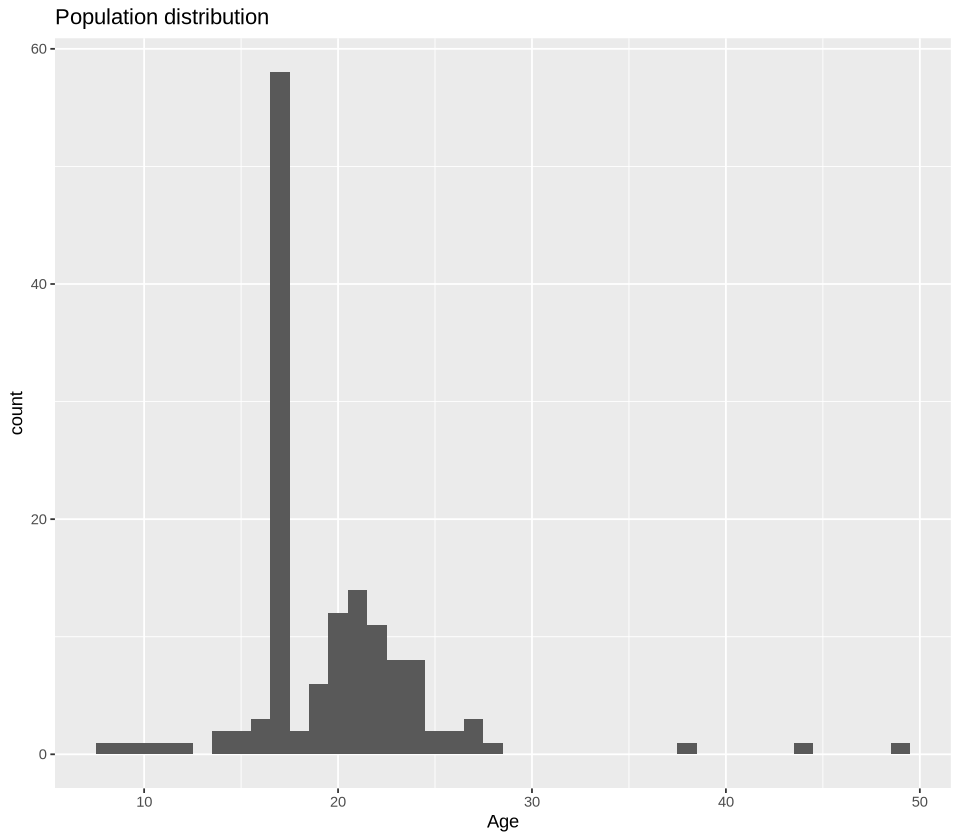

In [14]:
options(repr.plot.width = 8, repr.plot.height = 7)

pop_dist <- ggplot(subscribed_players, aes(x = Age)) + 
    geom_histogram(binwidth = 1) +
    xlab("Age") +
    ggtitle("Population distribution")
pop_dist

It is hard to tell the population mean by just observing the distribution shape and center, which also indicates that there is no obvious trend or corellation between age and subscribe behaviour.

Then group the data by players' experience levels and whether they subscribed to newsletter and average out the total played_hours of each group using summarize() function:

In [15]:
sub_players <- players |>
    group_by(experience, subscribe) |>
    summarize(average_hours = mean(played_hours))
sub_players

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,average_hours
<chr>,<lgl>,<dbl>
Amateur,FALSE,0.36666667
Amateur,TRUE,8.27777778
Beginner,FALSE,1.17500000
Beginner,TRUE,1.27037037
Pro,FALSE,0.57500000
Pro,TRUE,3.41000000
Regular,FALSE,0.02857143
Regular,TRUE,22.59655172
Veteran,FALSE,0.50666667


Visualize the dataset using bar chart. Let x = experience levels and y = average hours played. The color represents players' subscribion status: blue indicates subscribed and otherwise red:

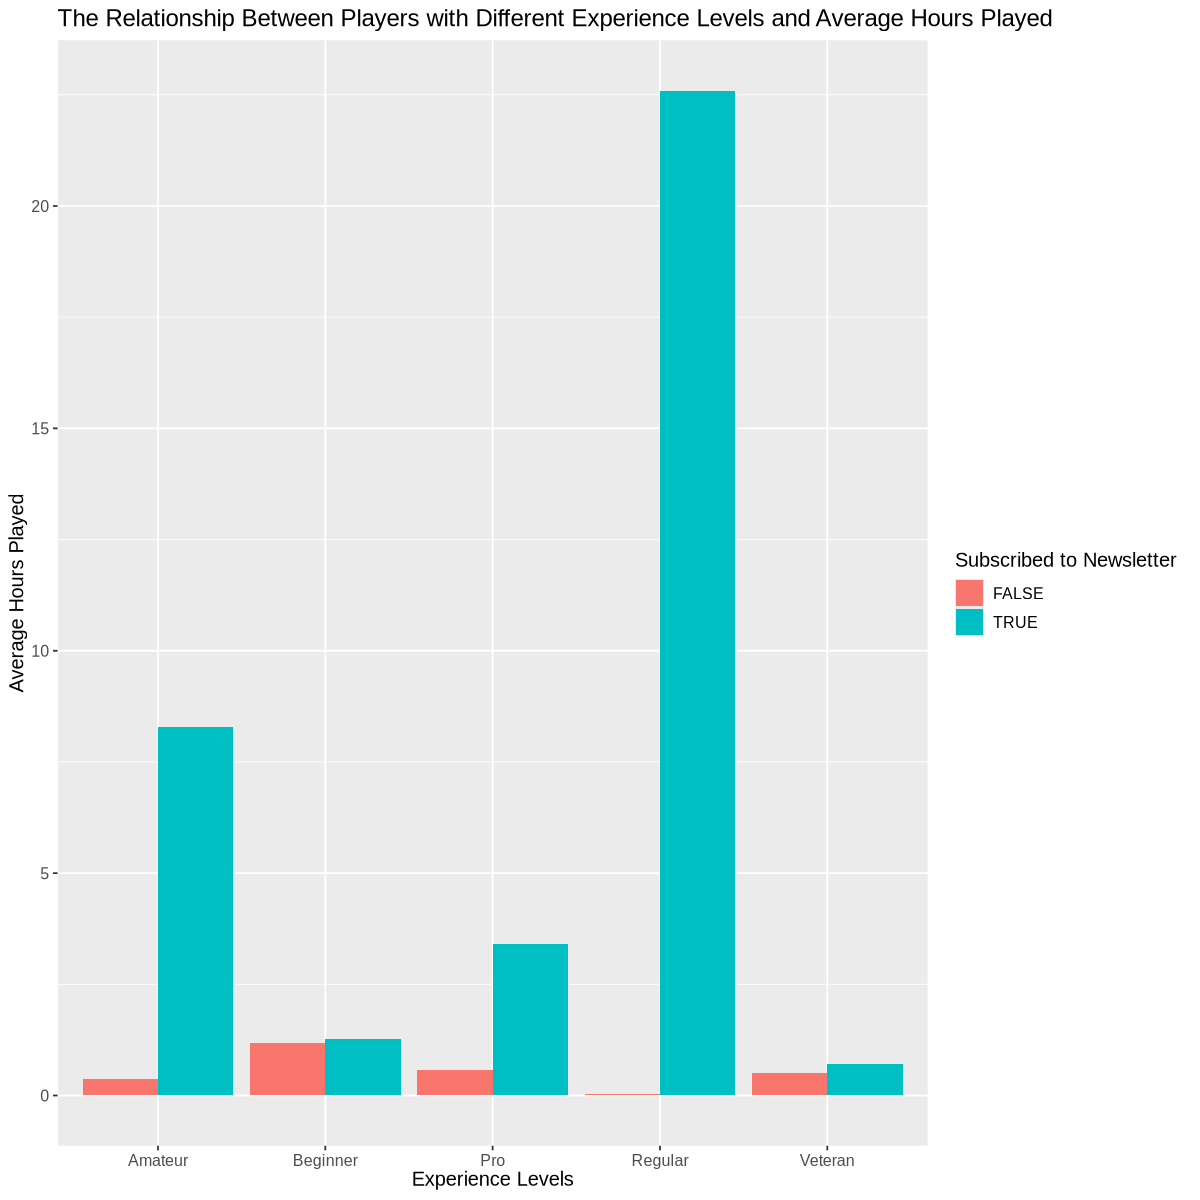

In [17]:
options(repr.plot.width = 10, repr.plot.height = 10)
players_graph <- sub_players |>
    ggplot(aes(x = experience, y = average_hours, fill = subscribe)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Experience Levels",
         y = "Average Hours Played",
         fill = "Subscribed to Newsletter",
         title = "The Relationship Between Players with Different Experience Levels and Average Hours Played") +
    theme(text = element_text(size = 12))
players_graph

Noticeably, the average play time for subscribed regular players is extremely high. the There is a strong comparison showing that regardless of which experience levels players subscribe to newsletter have a much higher average play time, leaving play time the strongest variable in predicting subscription to newsletter.